# Relatório VII
___
### Criando agrupamentos

#### Importando bibliotecas

In [60]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))

#### Importando dados

In [61]:
data = pd.read_csv('../data/aluguel_residencial.csv', sep=';')
data.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


#### Valor médio

In [62]:
data['Valor'].mean().round(2)

5159.32

#### Mostra apenas os dados que estão na lista de dados escolhidos. 

In [63]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = data['Bairro'].isin(bairros)
data = data[selecao]

In [64]:
data['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
79           Flamengo
Name: Bairro, dtype: object

In [65]:
grupo_bairro = data.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [66]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 61, 62, 65, 69, 75, 80, 94, 108, 111, 113, 118, 131, 133, 137, 152, 155, 157, 167, 168, 175, 188, 191, 210, 217, 224, 227, 236, 239, 242, 247, 262, 268, 277, 279, 294, 295, 296, 298, 305, 311, 314, 329, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 456, 467, 468, 470, 478, 481, 489, 500, 506, 509, 517, 543, 544, 545, 546, 549, 553, 558, 560, 561, 562, 592, 595, 596, 598, 602, 604, 609, 619, 631, 639, ...], 'Botafogo': [23, 48, 58, 88, 89, 112, 120, 128, 135, 138, 199, 203, 228, 327, 338, 366, 419, 420, 504, 530, 532, 551, 601, 659, 695, 729, 766, 776, 784, 835, 840, 874, 931, 940, 944, 1023, 1060, 1098, 1109, 1128, 1134, 1145, 1158, 1183, 1220, 1224, 1242, 1269, 1301, 1314, 1324, 1337, 1368, 1404, 1423, 1436, 1441, 1457, 1478, 1521, 1542, 1554, 1604, 1655, 1680, 1695, 1724, 1766, 1767, 1814, 1840, 1849, 1852, 1879, 1948, 1957, 1984, 1999, 2008, 2016, 2056, 2093, 2096, 2108, 2110, 2111, 2

In [67]:
for bairro, dados in grupo_bairro:
    print(f'{bairro} -> {dados["Valor"].mean().round(2)}')

Barra da Tijuca -> 7089.93
Botafogo -> 9328.87
Copacabana -> 4137.69
Flamengo -> 4146.93
Ipanema -> 9525.76
Leblon -> 8791.99
Tijuca -> 2133.79


In [68]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7089.93,3588.23
Botafogo,9328.87,905.31
Copacabana,4137.69,1147.00
Flamengo,4146.93,1100.61
Ipanema,9525.76,2230.64
Leblon,8791.99,2104.63
Tijuca,2133.79,702.12


#### Estatísticas Descritivas

In [69]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3866.0,7089.93,11914.52,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,944.0,9328.87,146382.98,700.0,2300.0,3200.0,4650.0,4500000.0
Copacabana,2649.0,4137.69,3627.79,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,715.0,4146.93,3939.06,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1779.0,9525.76,8706.01,1200.0,4500.0,7000.0,11500.0,100000.0
Leblon,1260.0,8791.99,7092.24,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1115.0,2133.79,1896.81,750.0,1500.0,1800.0,2300.0,45000.0


In [70]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27409683.0
Botafogo,700.0,4500000.0,8806456.0
Copacabana,100.0,35000.0,10960734.0
Flamengo,800.0,35000.0,2965058.0
Ipanema,1200.0,100000.0,16946330.0
Leblon,100.0,100000.0,11077902.0
Tijuca,750.0,45000.0,2379172.0


Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

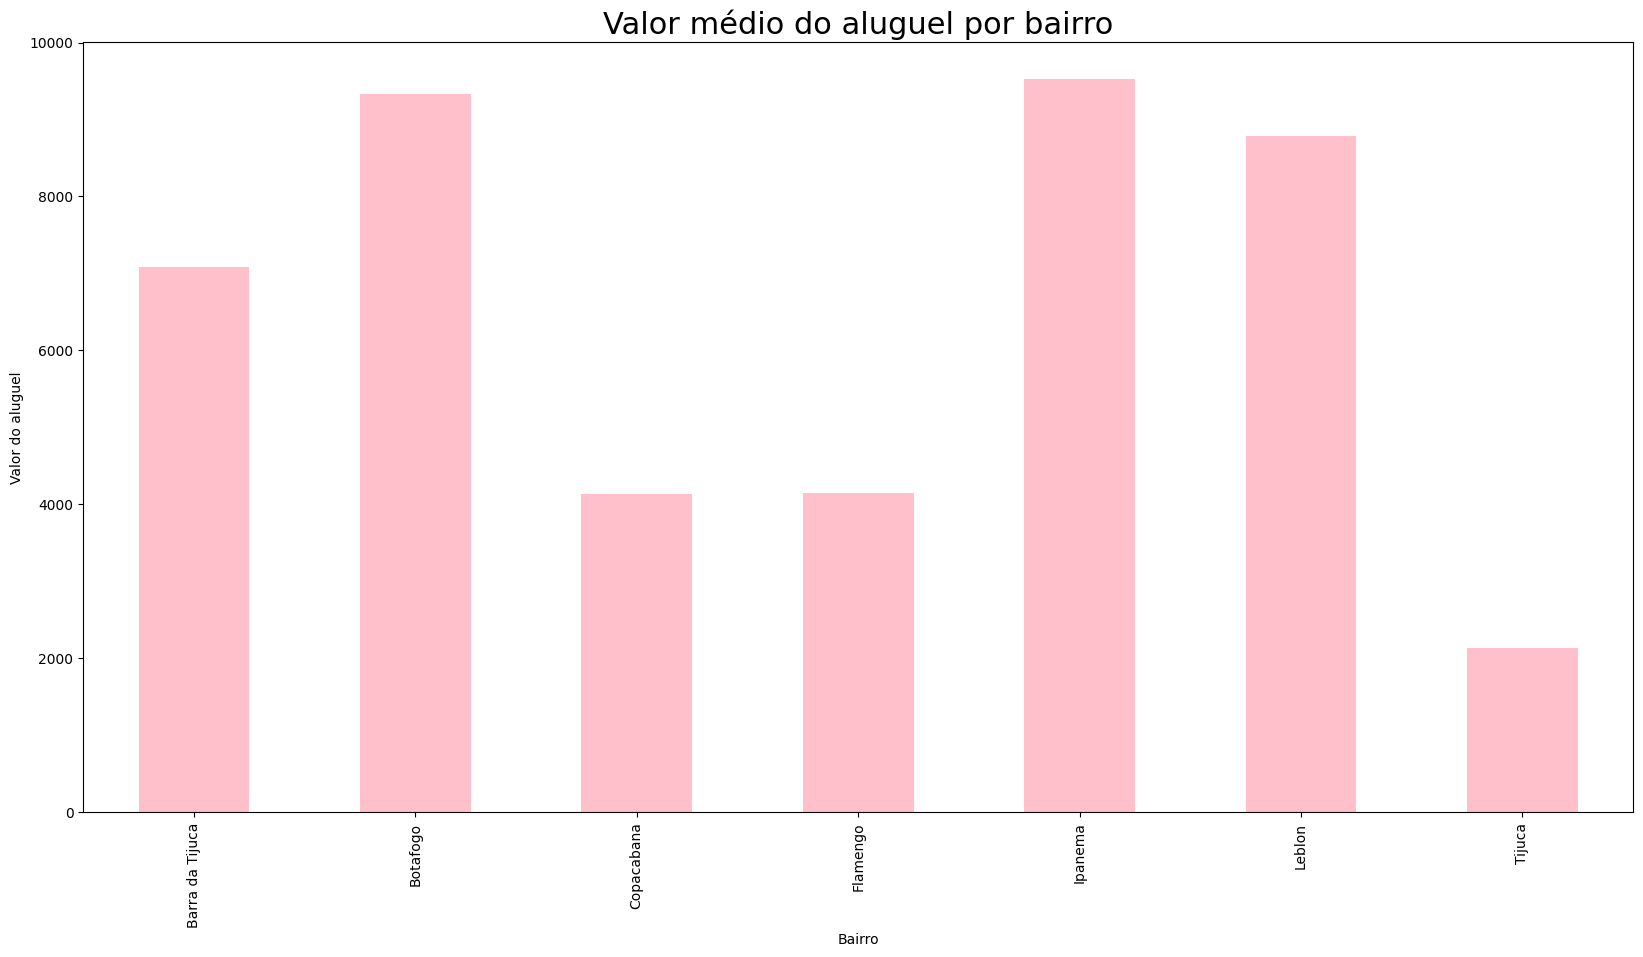

In [71]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='pink')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22})